# PART A: UNSUPERVISED LEARNING (40 marks)

In [1]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = data.data

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# add a list to store all the results of the score
results = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    
    #Using Inertia 
    inertia = kmeans.inertia_
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(
            n_cluster, sil_coeff))
    results.append({'n clusters':n_cluster,'Silhouette Coefficient':sil_coeff, 'inertia':inertia})

For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.4980505049972867
For n_clusters=5, The Silhouette Coefficient is 0.4887488870931048
For n_clusters=6, The Silhouette Coefficient is 0.3678464984712235
For n_clusters=7, The Silhouette Coefficient is 0.34750423280461507
For n_clusters=8, The Silhouette Coefficient is 0.36179003359737993
For n_clusters=9, The Silhouette Coefficient is 0.34102346846395204
For n_clusters=10, The Silhouette Coefficient is 0.3088732000186714


In [6]:
import pandas as pd

results_df=pd.DataFrame (results)
results_df

,n clusters,Silhouette Coefficient,inertia
0,2,0.681046,152.347952
1,3,0.552819,78.851441
2,4,0.498051,57.228473
3,5,0.488749,46.446182
4,6,0.367846,39.066035
5,7,0.347504,34.409010
6,8,0.361790,30.063111
7,9,0.341023,28.036906
8,10,0.308873,26.284571


## To select optimal number of clusters in KMeans Algorithm, I made use of 2 methods.

## 1) Silhouette Coefficient
The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.
#### Silhouette Coefficient = (x-y)/ max(x,y)
##### y is the mean intra cluster distance: mean distance to the other instances in the same cluster.
##### x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

## 2) Inertia
##### It is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model.

### Using Silhouette Coefficient
k=2 has a coefficient of 0.681046

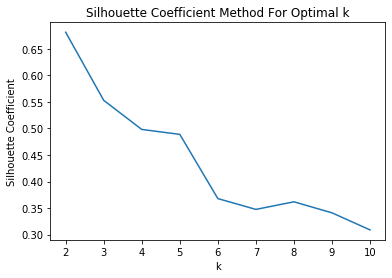

<Figure size 1440x720 with 0 Axes>

In [7]:
plt.plot(results_df['n clusters'],results_df['Silhouette Coefficient'])
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Method For Optimal k')
plt.figure(figsize=(20,10))
plt.show()

### Using Inertia to check for large change to choose n_cluster value (k value)

As depicted in the following diagram, curve looks like a hand and the number of clusters to be chosen over there should be equal to 3 as after that curve reaches a plateau.

##### As k increases, the sum of squared distance tends to zero.


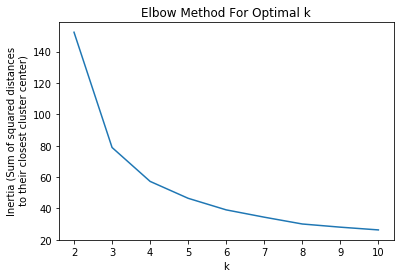

<Figure size 1440x720 with 0 Axes>

In [8]:
#Based on the chart, choose 3 with largest drop point

plt.plot(results_df['n clusters'],results_df['inertia'])
plt.xlabel('k')
plt.ylabel('Inertia (Sum of squared distances\n to their closest cluster center)')
plt.title('Elbow Method For Optimal k')
plt.figure(figsize=(20,10))
plt.show()

### Both methods provided different k value. We will try both values and additional values to see the results.
After looking at the plot of k=2 and k=3, the best possible value of k should be 3.
#### Silhouette Coefficient, k=2
#### Inertia (Elbow Method), k=3

Plotting the Actual data


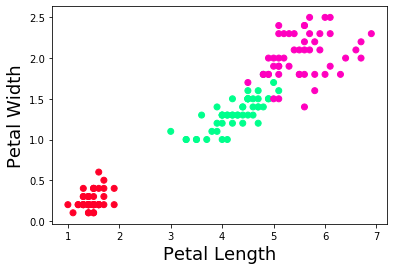

Showing the effect of k=2
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


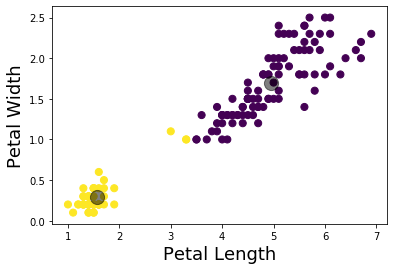

Showing the effect of k=3
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


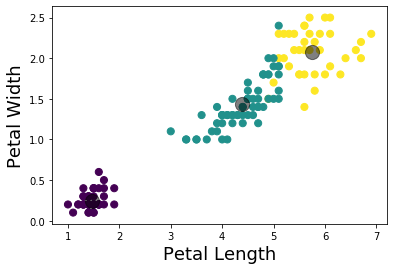

Showing the effect of k=4
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


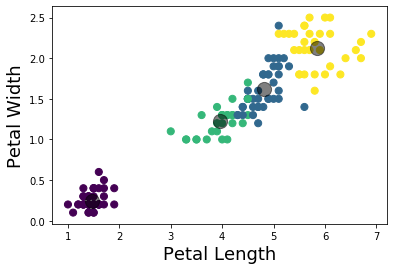

Showing the effect of k=5
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


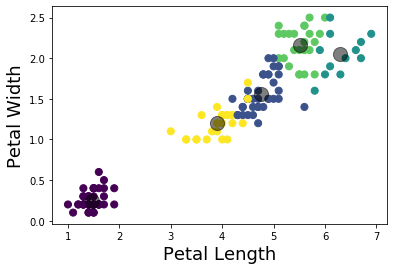

In [9]:
# K-means Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# load the iris datasets
dataset = load_iris()

print("Plotting the Actual data")
X = dataset.data
y = dataset.target
plt.scatter(X[:,2], X[:,3], c=y, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print("Showing the effect of k=2")

# fit a Kmeans model to the data
model = KMeans(n_clusters=2)
model.fit(dataset.data)
print(model)

# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print("Showing the effect of k=3")
dataset = load_iris()
model = KMeans(n_clusters=3)
model.fit(dataset.data)
print(model)

# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print("Showing the effect of k=4")
dataset = load_iris()
model = KMeans(n_clusters=4)
model.fit(dataset.data)
print(model)

# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print("Showing the effect of k=5")
dataset = load_iris()
model = KMeans(n_clusters=5)
model.fit(dataset.data)
print(model)

# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
y_kmeans = model.predict(X)
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

# Other Clustering algorithm (Trying GMM & DBSCAN)

GMM is a better clustering algorithm than kMeans

DBSCAN will be a bad clustering algorithm 

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

## GMM

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## The BIC criterion can be used to select the number of components in a Gaussian Mixture in an efficient way.

Automatically created module for IPython interactive environment


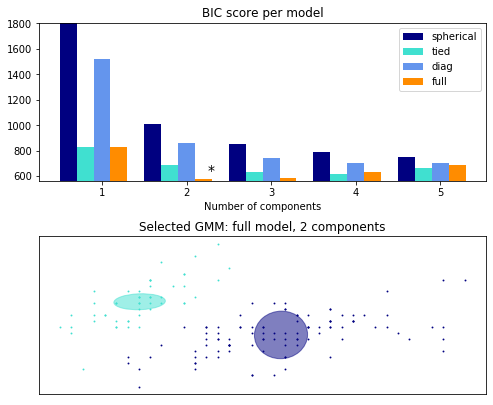

In [12]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

lowest_bic = np.infty
bic = []
n_components_range = range(1, 6)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [13]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
pred_gmm = gmm.predict(X)

covariance_type{‘full’ (default), ‘tied’, ‘diag’, ‘spherical’}
String describing the type of covariance parameters to use. Must be one of:

‘full’
each component has its own general covariance matrix

‘tied’
all components share the same general covariance matrix

‘diag’
each component has its own diagonal covariance matrix

‘spherical’
each component has its own single variance

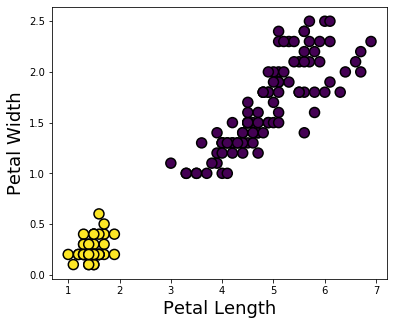

In [14]:
# Plot the clusters
plt.figure( figsize=(6,5))

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:,2], X[:,3], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

In [15]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
pred_gmm = gmm.predict(X)

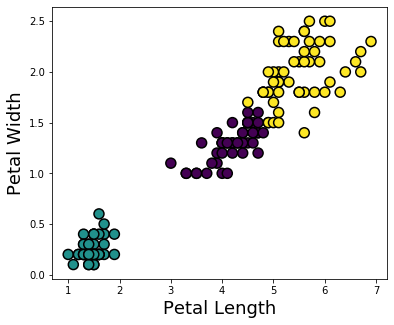

In [16]:
# Plot the clusters
plt.figure(figsize=(6,5))

# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:,2], X[:,3], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

## Other Clustering algorithm (DBSCAN)
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

### Choosing the optimum Epsilon (EPS value)

Read a research paper from https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

#### Distance to nearest n points

Calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [17]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2) # using n_neighbours=2 to find the next closest neighbour
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [18]:
distances

array([[0.        , 0.1       ],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.33166248],
       [0.        , 0.2236068 ],
       [0.        , 0.1       ],
       [0.        , 0.14142136],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.2236068 ],
       [0.        , 0.14142136],
       [0.        , 0.24494897],
       [0.        , 0.41231056],
       [0.        , 0.36055513],
       [0.        , 0.34641016],
       [0.        , 0.1       ],
       [0.        , 0.33166248],
       [0.        , 0.14142136],
       [0.        , 0.28284271],
       [0.        , 0.14142136],
       [0.        , 0.45825757],
       [0.        , 0.2       ],
       [0.        , 0.3       ],
       [0.        , 0.17320508],
       [0.        , 0.2       ],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.        , 0.14142136],
       [0.

In [19]:
indices

array([[  0,  17],
       [  1,  34],
       [  2,  47],
       [  3,  47],
       [  4,  37],
       [  5,  18],
       [  6,  47],
       [  7,  39],
       [  8,  38],
       [  9,  34],
       [ 10,  48],
       [ 11,  29],
       [ 12,   1],
       [ 13,  38],
       [ 14,  33],
       [ 15,  33],
       [ 16,  10],
       [ 17,   0],
       [ 18,   5],
       [ 19,  21],
       [ 20,  31],
       [ 21,  19],
       [ 22,   6],
       [ 23,  26],
       [ 24,  11],
       [ 25,  34],
       [ 26,  23],
       [ 27,  28],
       [ 28,  27],
       [ 29,  30],
       [ 30,  29],
       [ 31,  20],
       [ 32,  33],
       [ 33,  32],
       [ 34,   9],
       [ 35,  49],
       [ 36,  10],
       [ 37,   4],
       [ 38,   8],
       [ 39,   7],
       [ 40,  17],
       [ 41,   8],
       [ 42,  38],
       [ 43,  26],
       [ 44,  46],
       [ 45,   1],
       [ 46,  19],
       [ 47,   3],
       [ 48,  10],
       [ 49,   7],
       [ 50,  52],
       [ 51,  56],
       [ 52,

#### Next, sort and plot results to find out the optimal eps value

The optimal value for epsilon will be found at the point of maximum curvature. eps=0.4

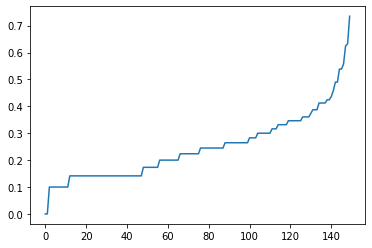

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Automatically created module for IPython interactive environment


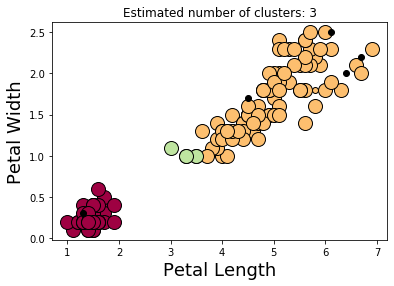

Estimated number of clusters: 3
Estimated number of noise points: 5


In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

print(__doc__)

# Compute DBSCAN using Iris dataset
db = DBSCAN(eps=0.6, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

## GMM appears to be the one that is more accurate when clustering IRIS data when compared with kMeans & DBSCAN

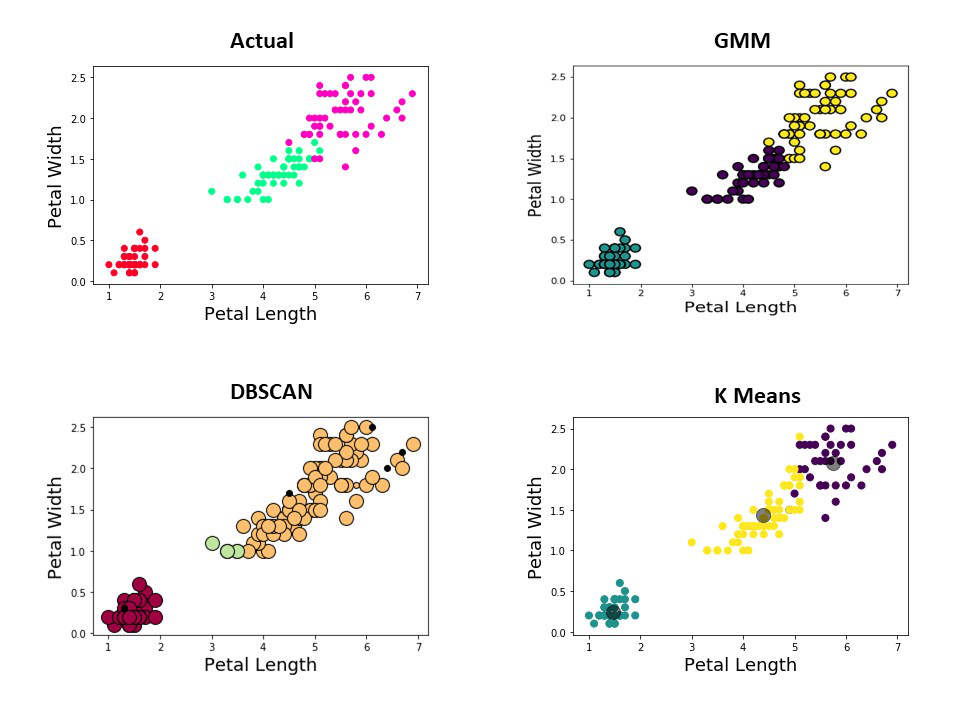

In [22]:
from PIL import Image
Image.open("CA2_comparison.jpg")

# PART B: DEEP LEARNING (60 marks)

The process of max pooling consists in taking a highest value within the area of the feature map overlaid by the window (nxn matrix) and putting it in the corresponding location of the pooled feature map. Pooling is useful in that it reduces the size of the image making it easier to compute and detect patterns despite differences in spatial orientation.

Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


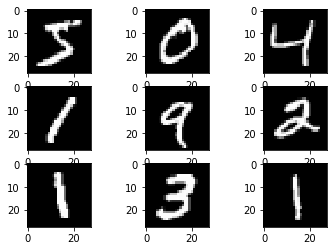

In [23]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [24]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Older Keras 1.X API, for 2D (image) set_image_dim_ordering('th') 
# assumes (depth,rows,cols), 'tf' assumes (rows,cols,depth). 
# K.set_image_dim_ordering('th')
# Keras 2.X API, for 2D (image) set_image_data_format('channels_first') 
# assumes (depth,rows,cols), 'channels_last' assumes (rows,cols,depth). 
K.set_image_data_format('channels_first') #Channels Last. Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].
                                          #Channels First. Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1, Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns.
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()

# 32 Neurons (feature maps) and 5 by 5 feature detector.
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# Max Pooling with 2 by 2 matrix
model.add(MaxPooling2D(pool_size=(2, 2)))

# To reduce overfitting, dropout sets 30% of inputs to zero during the training process to avoid overfitting.
model.add(Dropout(0.3))

model.add(Flatten()) # What is this?
model.add(Dense(128, activation='relu')) # What is this?
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=100, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.2411 - accuracy: 0.9317 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 2/100
 - 1s - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0548 - val_accuracy: 0.9823
Epoch 3/100
 - 1s - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0393 - val_accuracy: 0.9870
Epoch 4/100
 - 1s - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0413 - val_accuracy: 0.9866
Epoch 5/100
 - 1s - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 6/100
 - 1s - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0435 - val_accuracy: 0.9856
Epoch 7/100
 - 1s - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 8/100
 - 1s - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 9/100
 - 1s - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 10/100
 - 1s - 

### By the 30th epoch, we obtained an accuracy of 99% which is really good all things considered. Let’s see how well our model does at categorizing new images.

Evaluate

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 0s 48us/step
Test loss 0.07427593656173637
Test accuracy 0.9905999898910522


# Is there overfitting? Overfitting happens when our model fits too well to the training set.

If overfit, the training accuracy will be higher than the accuracy on the validation/test set.

## Should be no Overfitting, training and test accuracy is almost similar


### Visualize the loss and accuracy plots.

Text(0.5, 0, 'Epoch')

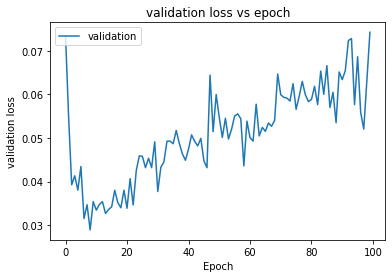

In [26]:
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

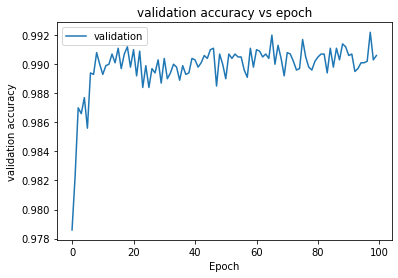

In [27]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

## Predict the number using the model

In [28]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[1])))

2


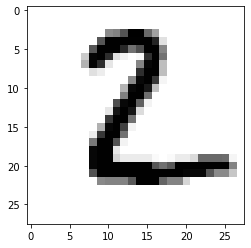

In [29]:
plt.imshow(X_test[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [30]:
import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier

y_pred_ohe = KerasClassifier.predict(X_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)

TypeError: predict() missing 1 required positional argument: 'x'

## Data Augmentation (Not needed now as dataset should be sufficient)

If dataset is no enough, use:

from keras.preprocessing.image import ImageDataGenerator